In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#--- redshift	photoz	m_u	m_g	m_r	m_i	m_z	petro50	petro90
sdss = np.load('/content/drive/MyDrive/Cursos/DR9_photo-z-small.npy')

In [ ]:
sdss.shape

(100000, 9)

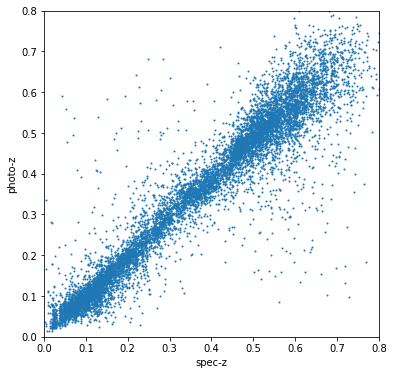

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.scatter(sdss[0:10000,0], sdss[0:10000,1], s=1)
plt.xlabel('spec-z')
plt.ylabel('photo-z')
plt.xlim(0,0.8)
plt.ylim(0,0.8)
plt.show()

In [ ]:
#n = sdss.shape[0]

#--- We leave the first 1000 elements for testing...
#X_train = np.zeros((100000,7), dtype=np.float32)
#X_train[:,0] = sdss[:,2] # u
#X_train[:,1] = sdss[:,3] # g
#X_train[:,4] = sdss[:,6] # z
#X_train[:,2] = sdss[:,4] # r
#X_train[:,3] = sdss[:,5] # i
#X_train[:,5] = sdss[:,7] # petro0
#X_train[:,6] = sdss[:,8] # petro90

#Y_train      = sdss[:,0]


X_train = sdss[0:90000,2:9]
Y_train = sdss[0:90000,0]

X_test = sdss[90000:100000,2:9]
Y_test = sdss[90000:100000,0]

print(X_test.shape)

(10000, 7)


In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu')) # (7*12)+12
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train,epochs=15, batch_size=32)

Epoch 1/15
2813/2813 [==============================] - 18s 2ms/step - loss: 0.4314 - mse: 0.4314
Epoch 2/15
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0100 - mse: 0.0100
Epoch 3/15
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0096 - mse: 0.0096
Epoch 4/15
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0091 - mse: 0.0091
Epoch 5/15
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0072 - mse: 0.0072
Epoch 6/15
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0060 - mse: 0.0060
Epoch 7/15
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0065 - mse: 0.0065
Epoch 8/15
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0060 - mse: 0.0060
Epoch 9/15
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0056 - mse: 0.0056
Epoch 10/15
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0073 - mse: 0.0073
Epoch 11/15
2813/2813 [=====

In [ ]:

Y_pred = model.predict(X_test)


Dispersion =  0.29810226


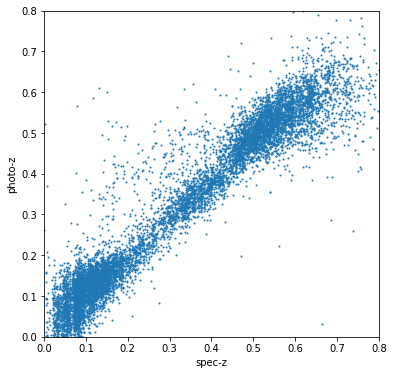

In [ ]:

print("Dispersion = ", np.std( (Y_pred - Y_test) ) )

plt.rcParams['figure.figsize'] = (6,6)
plt.scatter(Y_test, Y_pred, s=1)
plt.xlabel('spec-z')
plt.ylabel('photo-z')
plt.xlim(0,0.8)
plt.ylim(0,0.8)
plt.show()